In [1]:
import pandas as pd     # Se carga la Libreria de pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
sns.set(style="darkgrid")
sns.set(font_scale=0.9)
pd.options.mode.copy_on_write = True
import requests

In [2]:
df_homicidios= pd.read_excel('data/homicidios.xlsx', sheet_name=None)

In [3]:
print(df_homicidios.keys())

dict_keys(['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas'])


In [4]:
df_hechos_homicidios= df_homicidios['HECHOS']           # Se carga el dataset de "Hechos de Homicidios"
df_victimas_homicidios= df_homicidios['VICTIMAS']       # Se carga el dataset de "Victimas de Homicidios"

In [5]:
# Se carga el mapa de Buenos Aires
url_caba = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
gdf_caba = gpd.read_file(url_caba)

#### `Analisis del dataSet "Hechos_Homicidios"`

In [6]:
df_hechos_homicidios.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Se cuentas los valores nulos de las columnas y se puede ser que Altura tiene 567 datos nulos y Cruce tiene 171 datos nulos. Analizando los primeros registros del dataset, se puede ver que 'Cruce' tiene los mismos valores que las 'direccion normalizada' y 'lugar_del_hecho' por lo tanto se eliminara 'Cruce', 'direccion normalizada'. Las columnas altura y XY(CABA) no son relevantes para este analisis por lo tanto tambien se eliminaran.

In [356]:
df_hechos_homicidios= df_hechos_homicidios.drop(['Dirección Normalizada','Altura','Cruce','XY (CABA)' ], axis=1) # Eliminar columnas innecesarias

In [357]:
df_hechos_homicidios[df_hechos_homicidios['Calle'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,0,.,.,PEATON-SD,PEATON,SD


Se visualiza la unica fila de la columna 'calle' que es nulo y se puede ver que no tienes datos de direccion ni posicion, por lo tanto se eliminara

In [358]:
df_hechos_homicidios= df_hechos_homicidios.dropna(subset=['Calle']) # Elimina filas con app_name nulo

In [359]:
df_hechos_homicidios.duplicated().sum()     # Se cuentan las filas duplicadas

0

In [360]:
df_hechos_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               695 non-null    object        
 1   N_VICTIMAS       695 non-null    int64         
 2   FECHA            695 non-null    datetime64[ns]
 3   AAAA             695 non-null    int64         
 4   MM               695 non-null    int64         
 5   DD               695 non-null    int64         
 6   HORA             695 non-null    object        
 7   HH               695 non-null    object        
 8   LUGAR_DEL_HECHO  695 non-null    object        
 9   TIPO_DE_CALLE    695 non-null    object        
 10  Calle            695 non-null    object        
 11  COMUNA           695 non-null    int64         
 12  pos x            695 non-null    object        
 13  pos y            695 non-null    object        
 14  PARTICIPANTES    695 non-null    object        

In [361]:
df_hechos_homicidios['pos x'].value_counts() # Contar los valores

pos x
.               11
-58.44451316     5
-58.50073810     4
-58.46743471     4
-58.50877521     4
                ..
-58.39100580     1
-58.37697717     1
-58.45807401     1
-58.42023854     1
-58.37976155     1
Name: count, Length: 605, dtype: int64

Haciendo un conteo de valores se puede observar que tiene 11 valores con "." por lo tanto procederemos a eliminar estos registros

In [362]:
df_hechos_homicidios= df_hechos_homicidios[df_hechos_homicidios['pos x'] != '.']

C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_1476\1685321453.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 50)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_1476\1685321453.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 50)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_1476\1685321453.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 50)


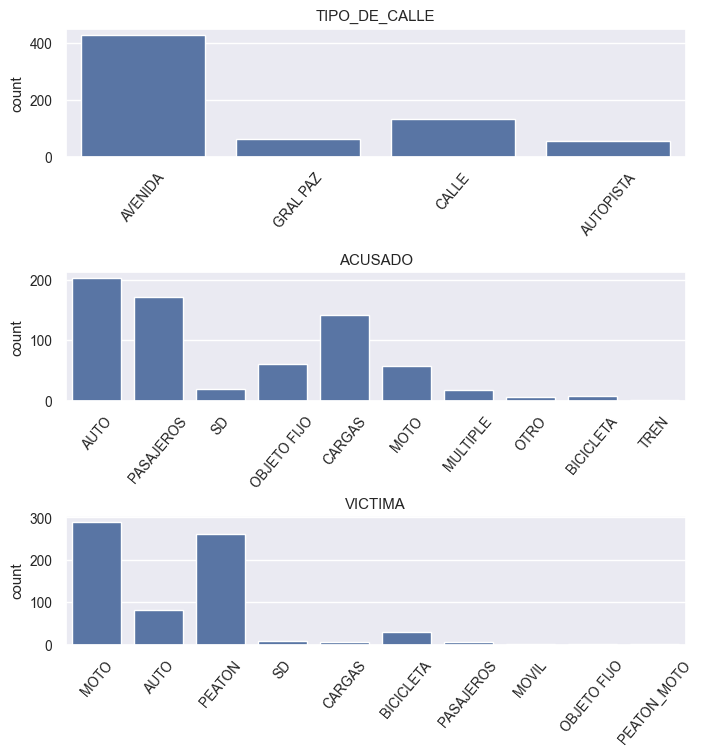

In [341]:
columnas= ['TIPO_DE_CALLE', 'ACUSADO', 'VICTIMA']
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize= (8,8))
fig.subplots_adjust(hspace= 0.9)
for i, col in enumerate(columnas):
    sns.countplot(data=df_hechos_homicidios, x= col, ax= ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 50)
    

Observaciones:
1. No hay valores que sean iguales pero que se diferencien por tener letras mayusculas o minusculas. Tambien se pueden ser valore con "SD" lo cual significa que no tiene datos de ese registro.
2. La mayoria de los acusados son Autos y buses de pasajeros. Las fueron personas en moto o peatones

In [363]:
df_hechos_homicidios = df_hechos_homicidios.rename(columns={'pos x': 'longitud', 'pos y':'latitud'}) # cambiar de nombre las clumnas pos x, pos y

In [364]:
df_hechos_homicidios.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,longitud,latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [365]:
df_victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


El dataset de victimas 717 registros y ningun valor nulo

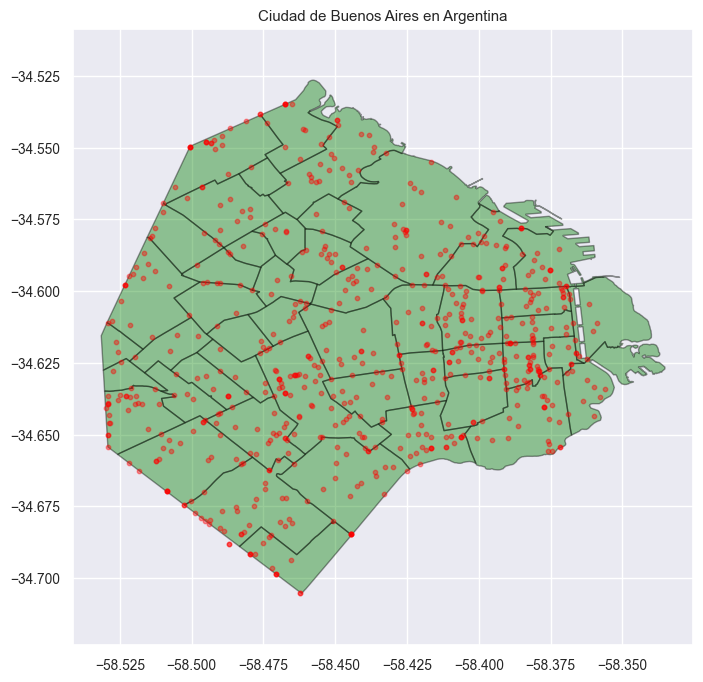

In [366]:
# Se cargan los Puntos geograficos
geometry = gpd.points_from_xy(df_hechos_homicidios['longitud'], df_hechos_homicidios['latitud'], crs="EPSG:4326")
gdf_homicidios = gpd.GeoDataFrame(df_hechos_homicidios, geometry=geometry)

# Plotear el mapa de Argentina y la Ciudad Autónoma de Buenos Aires
fig, ax = plt.subplots(figsize=(8, 8))

gdf_caba.plot(ax=ax, color='green', edgecolor='black', alpha=0.4)
gdf_homicidios.plot(ax=ax, color='red', markersize=10, alpha=0.4)
ax.set_title('Ciudad de Buenos Aires en Argentina')
plt.axis('equal')
plt.show()

En este Grafico podemos observar la densidad de los homicidos segun los puntos geograficos donde ocurrieron. Se puede notar que hay algos sitios donde ocurrieron mas accidentes. Intentaremos everiguar porque en esas ubicaciones hay mas muerte por accidendes

#### `Analisis del dataSet "Victimas_Homicidios"`

In [367]:
df_victimas_homicidios.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_1476\1983922759.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 35)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_1476\1983922759.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 35)
C:\Users\Familia Velazco\AppData\Local\Temp\ipykernel_1476\1983922759.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 35)


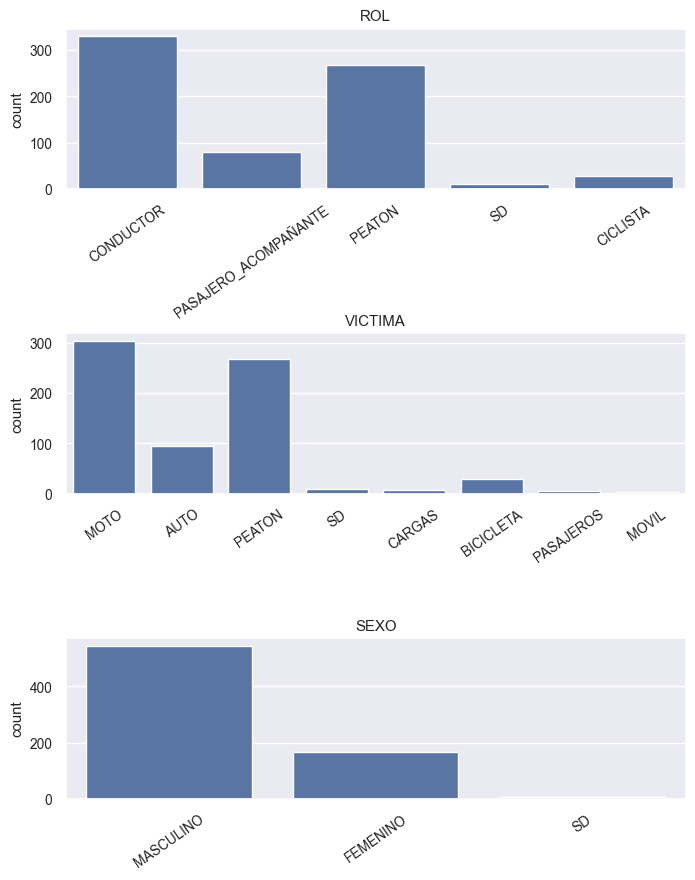

In [368]:
columnas= ['ROL', 'VICTIMA', 'SEXO']
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize= (8,10))
fig.subplots_adjust(hspace= 0.9)
for i, col in enumerate(columnas):
    sns.countplot(data=df_victimas_homicidios, x= col, ax= ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation= 35)

Ossrvaciones:
1. No hay valores que sean iguales pero que se diferencien por tener letras mayusculas o minusculas. Se puede apreciar que tambien hay varios valores "SD" lo cual significa que no hay datos
2. La mayoria de las victimas eran de sexo masculino

In [369]:
df_victimas_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Se calculan nos promedios de las edades por sexo para imputar los registros faltantes

In [370]:
Promedio_edad_M= round(df_victimas_homicidios[(df_victimas_homicidios['SEXO'] == 'MASCULINO') & (df_victimas_homicidios['EDAD'] != 'SD')]['EDAD'].mean())
print(Promedio_edad_M)
Promedio_edad_F= round(df_victimas_homicidios[(df_victimas_homicidios['SEXO'] == 'FEMENINO') & (df_victimas_homicidios['EDAD'] != 'SD')]['EDAD'].mean())
print(Promedio_edad_F)

40
51


Se Imputan los los valores sin datos (SD) con el promedio de edad de cada sexo

In [371]:
df_victimas_homicidios.loc[(df_victimas_homicidios['SEXO'] == 'MASCULINO') & (df_victimas_homicidios['EDAD'] == 'SD'),'EDAD'] = Promedio_edad_M
df_victimas_homicidios.loc[(df_victimas_homicidios['SEXO'] == 'FEMENINO') & (df_victimas_homicidios['EDAD'] == 'SD'),'EDAD'] = Promedio_edad_F

In [372]:
df_victimas_homicidios= df_victimas_homicidios[df_victimas_homicidios['EDAD'] != 'SD']      # Se Omiten los registros con edad sin datos

In [373]:
df_victimas_homicidios

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


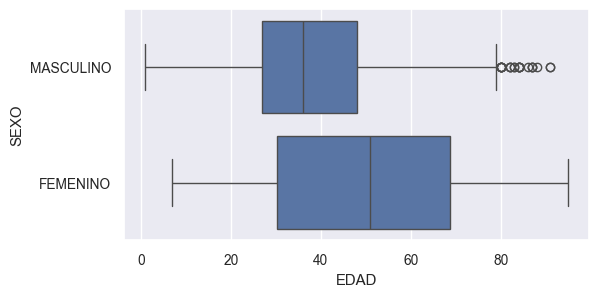

In [374]:
plt.figure(figsize= (6,3))
sns.boxplot(data=df_victimas_homicidios, x='EDAD', y='SEXO')
plt.show()

En este grafico podemos observar que la mediana de las victimas masculinos es mas o menos 37 y que la mayoria entan entre un pocos menos de 30 hasta los casi 80 años. En cambio las mediana de las victimas femeninas es un poco mas de 50 y las mayoria entan entre los 30 y los casi 100 años. Tambien se pueden ver alunos valores atipicos de edades entre elos los y 90 años, pero no son outliers pues estan entre las edades normales que puede llegar a tener un ser humano

In [ ]:
#gdf.plot(column='COMUNA', cmap='plasma', ax=ax, zorder=3)

################################################################################################################################

Obtener datos de la API "api-transporte.buenosaires.gob.ar"

In [20]:
url = 'https://apitransporte.buenosaires.gob.ar/transito/v1/semaforos?'
client_id = '01929d26b24941418358b80dd3ef7560'
client_secret = '8c1CcaDdEF0142B09AEaDD63D2a7068E'

parametros = {    
    'client_id': client_id,
    'client_secret': client_secret
}

In [23]:
respuesta = requests.get(url, params=parametros)

In [34]:
if respuesta.status_code == 200:
    datos = respuesta.json()['list']
df= pd.DataFrame(datos)

In [35]:
df

,provider,type,code,name,status,latitude,longitude
0,UTC API,Cruce Citar,3337,3337,Conectado,-34.576578,-58.431704
1,UTC API,Cruce Citar,3338,3338,Conectado,-34.583724,-58.423080
2,UTC API,Cruce Citar,3339,3339,Conectado,-34.577002,-58.430329
3,UTC API,Cruce Icarus,CLT#040317,Av. Córdoba - Fitz Roy,Conectado,-34.587578,-58.440181
4,UTC API,Cruce Icarus,CLT#040316,Av. Córdoba - Humbolt,Conectado,-34.588099,-58.439413
...,...,...,...,...,...,...,...
3136,UTC API,Cruce Icarus,CLT#060836,Av. Juan B. Alberdi - Carhué,Conectado,-34.659017,-58.512317
3137,UTC API,Cruce Sitra,ef7f6550-fef3-4c2a-b480-e9fad9b975c2,8609,Desconocido,-34.636992,-58.398477
3138,UTC API,Cruce Icarus,CLT#060830,Av. Juan B. Alberdi - Cafayate,Conectado,-34.655040,-58.506506
3139,UTC API,Cruce Icarus,CLT#080420,Av. San Martín - Av. Donato Álvarez - Dickman,Error de conexión,-34.602886,-58.464888
